In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return (np.exp(-1.*x))/(1.+(x-1.)**2)

In [3]:
# a)
def monte_carlo_naive(a,b,num=int(1e6),bins=50):
    def estimate_I():
        xs = np.random.uniform(a, b, (num,))
        ys = f(xs)
        return (b-a) * np.mean(ys)
    Is =[estimate_I() for i in range(bins)]
    return np.mean(Is), np.std(Is)

In [4]:
a = 0. 
b = 10.
I1, sigma1 = monte_carlo_naive(a,b)
I, err = integrate.quad(f,a,b)
print("First estimate      I: ", I1, " sigma: ", sigma1, flush=True)
print("Build-in integrator I: ", I, flush=True)

First estimate      I:  0.6962950471506253  sigma:  0.001634116871696304
Build-in integrator I:  0.6960913664575288


In [5]:
# b)
def g(x,alpha):
    return alpha * np.exp(-alpha*x)

In [6]:
# Obtain a good value for alpha:
def optimize_alpha(a,b, num=int(1e6) ):
    
    xs = np.random.uniform(a,b,(num,))
    fs = f(xs)
    
    var = []
    alphas = np.arange(0.3,2.,0.01)
    for alpha in alphas:
        gs = g(xs,alpha)
        var.append( np.var(fs/gs) ) 
        
    plt.figure()
    plt.semilogy(alphas,var)
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Variance")
    plt.show()
        
    alpha_best = alphas[ np.argmin(var) ]
    return alpha_best

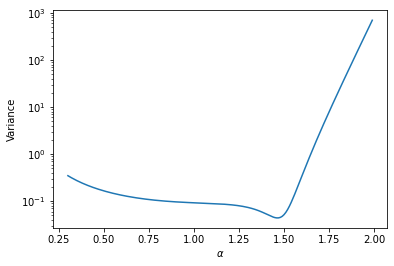

Best alpha:  1.46


In [7]:
alpha_best = optimize_alpha(a,b)
print("Best alpha: ", np.round(alpha_best, 2), flush=True)

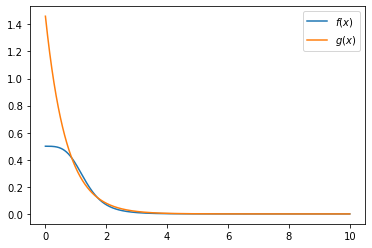

In [8]:
# Compare f and pdf g explicitly
x = np.linspace(a,b,1000)
plt.figure()
plt.plot(x,f(x),label=r"$f(x)$")
plt.plot(x,g(x,alpha_best),label=r"$g(x)$")
plt.legend()
plt.show()

In [9]:
def G_inverse(x,alpha):
     return -1.*np.log(1-x) / alpha
    
def monte_carlo(alpha,num=int(1e6),bins=50):
    def estimate_I():
        r = np.random.rand(num)
        est = f( G_inverse(r, alpha)) / g( G_inverse(r, alpha), alpha)
        return np.mean(est)
    Is =[estimate_I() for i in range(bins)]
    return np.mean(Is), np.std(Is)

In [10]:
I2, sigma2 = monte_carlo(alpha_best)
print("First estimate      I: ",I1, " sigma: ",sigma1, flush=True)
print("Second estimate     I: ",I2, " sigma: ",sigma2, flush=True)
print("Build-in integrator I: ",I,flush=True)

First estimate      I:  0.6962950471506253  sigma:  0.001634116871696304
Second estimate     I:  0.6961281703540857  sigma:  0.0003145706135395162
Build-in integrator I:  0.6960913664575288


Note that the error decreases by one order of magnitude when importance sampling is used.